<span style='font-size:x-large'>**Livrable 3 : Simulation numérique**</span>


<span style='font-size:large'>**Importations des bibliothèques :**</span>



In [2]:
from math import *                  # Pour utiliser des fonctions mathématiques tel que sin.....
import numpy as np                  # Pour faire des array et donc faire des graphiques plus simplement
import matplotlib.pyplot as plt     # Pour faire des graphiques

<span style='font-size:large'>**Les variables et constantes :**</span>


In [3]:
g = 9.81                # Accélération gravitationelle en m/s^2
alpha = radians(40)     # Angle de la pente
m = 0.03                # Masse de la voiture en kg
h = 0.93                # Hauteur max de la pente
D = 0.23                # Diamètre du looping en m
Hr = 0.1                # Hauteur du ravin en m
Lr = 0.7                # Largeur du ravin en m
ur = 0.002              # Coeficient de frottement du sol pas d'unité
Cx = 0.04               # Coeficient de trainée pas d'unité
SCx = 0.001             # Coefficient de frottement dans le ravin sur x
S1 = 0.0003             # Surface de référence de la voiture en m2
ro = 1.225              # Masse volumique de l'air en kg/m3
R = D/2                 # Rayon du looping
vhl = (g*R)**0.5        # Vitesse pour que la Resultante des forces soit supérieur à 0

<span style='font-size:x-large'>**Pente :**</span>

<span style='font-size:large'>**Sans frottements**</span>



<span style='font-size:medium'>**Calcul et tracé de la vitesse de sortie en fonction de la hauteur de la pente**</span>


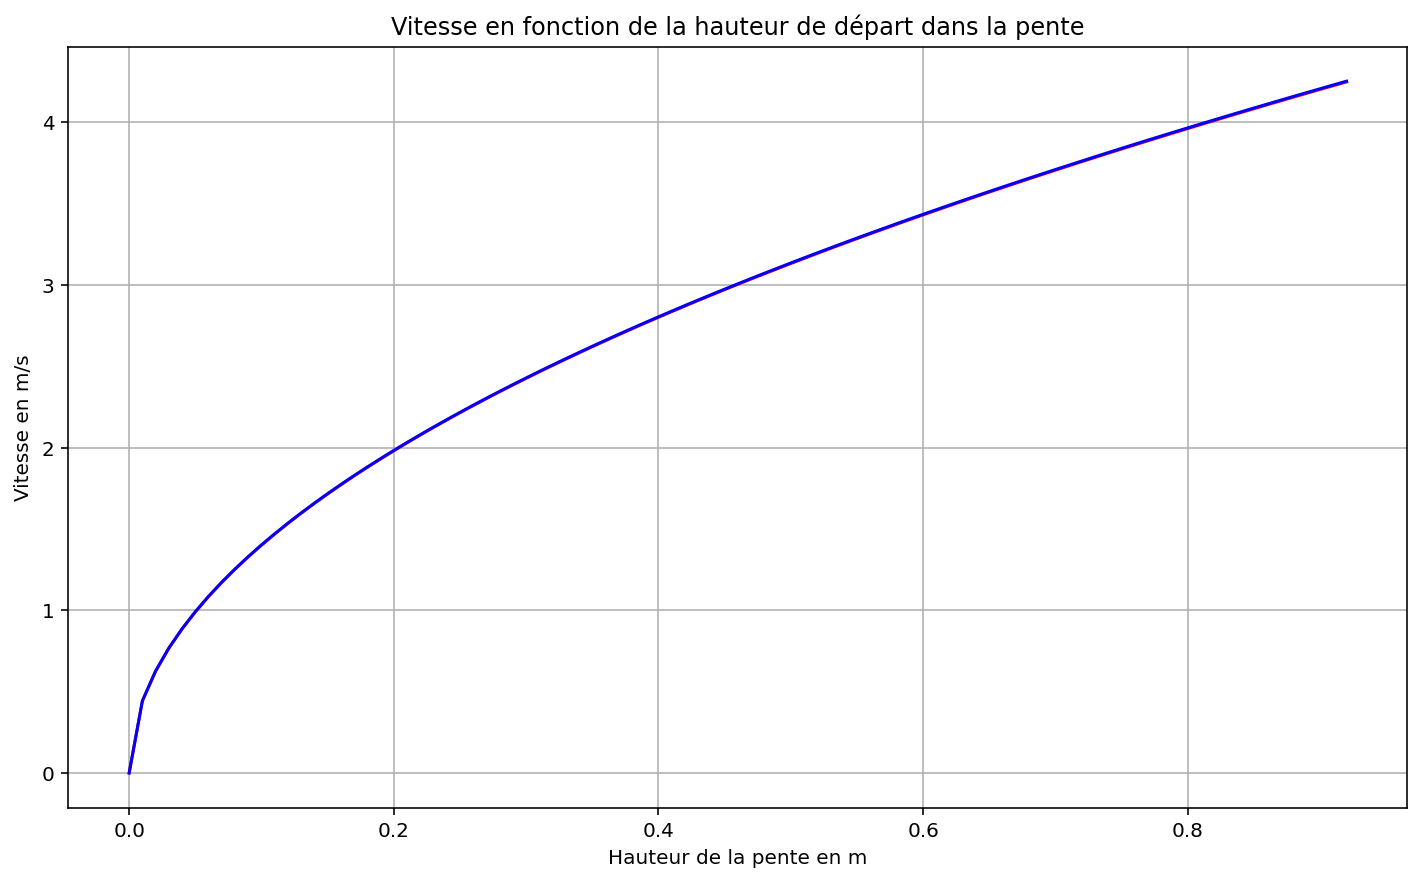

In [15]:
xp = np.arange(0, h, 0.01)     # Liste des différentes possibilité de la hauteur de 0 m à 0.93 m avec un saut de 0.05 m

yp = (2*g*xp)**0.5                 # Calcul de la vitesse en bas de la pente (à l’aide de la 2ème loi de Newton)

zp = 6.29 * (0.497*xp)**0.5 

plt.plot(xp, yp,"Red")
plt.plot(xp, zp,"Blue")
plt.ylabel("Vitesse en m/s")
plt.xlabel("Hauteur de la pente en m")
plt.title("Vitesse en fonction de la hauteur de départ dans la pente")
plt.grid()
plt.show()

<span style='font-size:x-large'>**Looping :**</span>

<span style='font-size:large'>**Sans frottements**</span>



In [5]:
val = int((5*g*R)**0.5 * 100)/100

print("La vitesse minimale nécéssaire pour passer le looping \n(sans prendre en compte les frottements) est de :", val, "m/s")

print("")

hmin = int((5*R)/2 * 100)/100
print("La hauteur minimale à laquelle doit débuter le véhicule pour faire le looping \nsans prendre en compte les frottements est (approximativement) :",hmin,"m")

print("")

valmax = int((2*g*h)**0.5 * 100)/100

print("La vitesse maximal \n(sans prendre en compte les frottements) est de :", valmax, "m/s")




La vitesse minimale nécéssaire pour passer le looping 
(sans prendre en compte les frottements) est de : 2.37 m/s

La hauteur minimale à laquelle doit débuter le véhicule pour faire le looping 
sans prendre en compte les frottements est (approximativement) : 0.28 m

La vitesse maximal 
(sans prendre en compte les frottements) est de : 4.27 m/s


<span style='font-size:medium'>**Tracé de la vitesse de la voiture au cours du temps**</span>



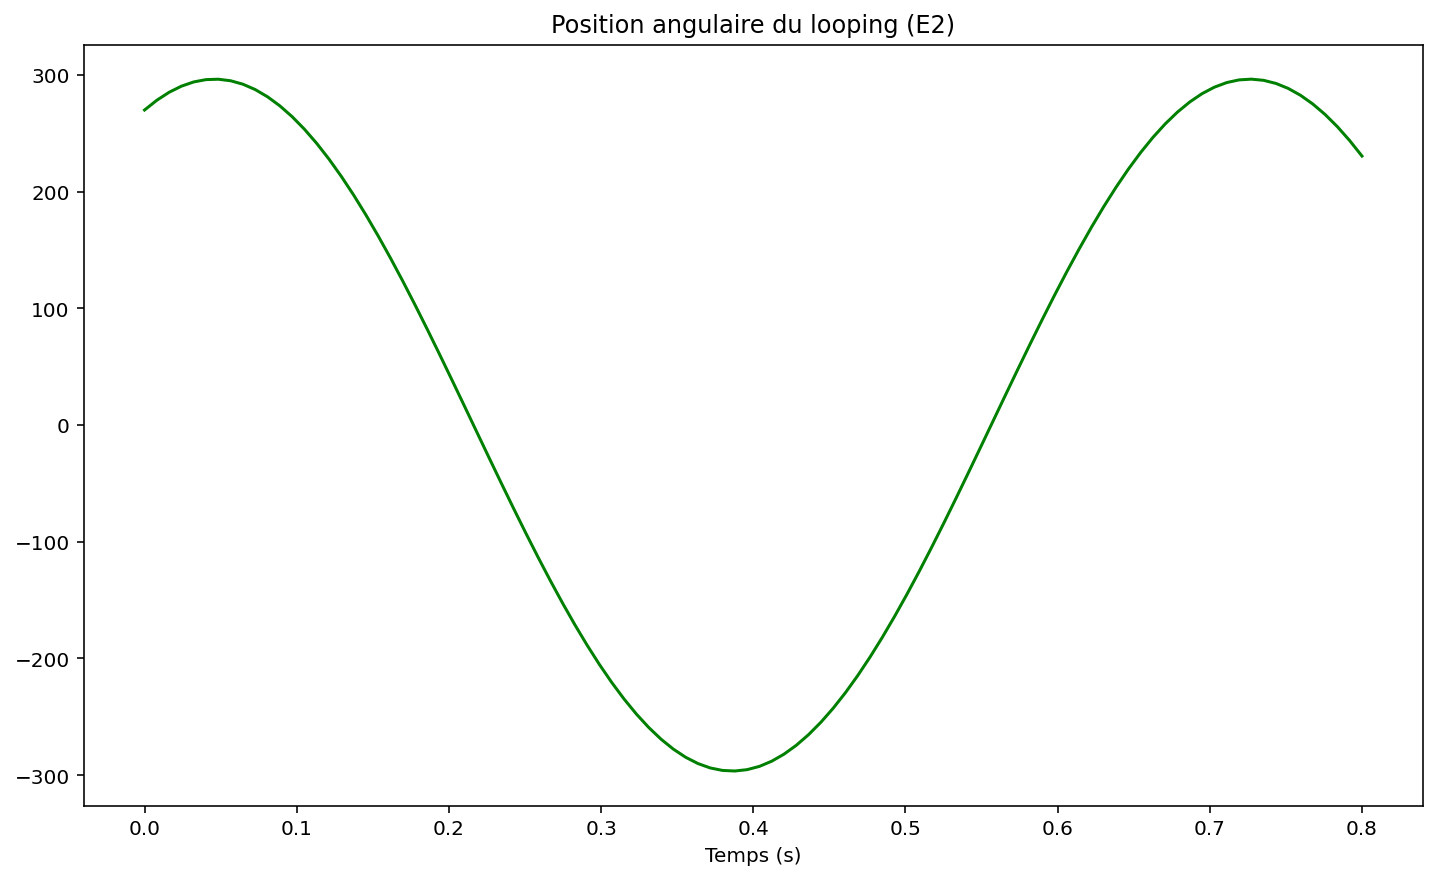

La vitesse minimale pour franchir le looping est de: 4.27 m/s


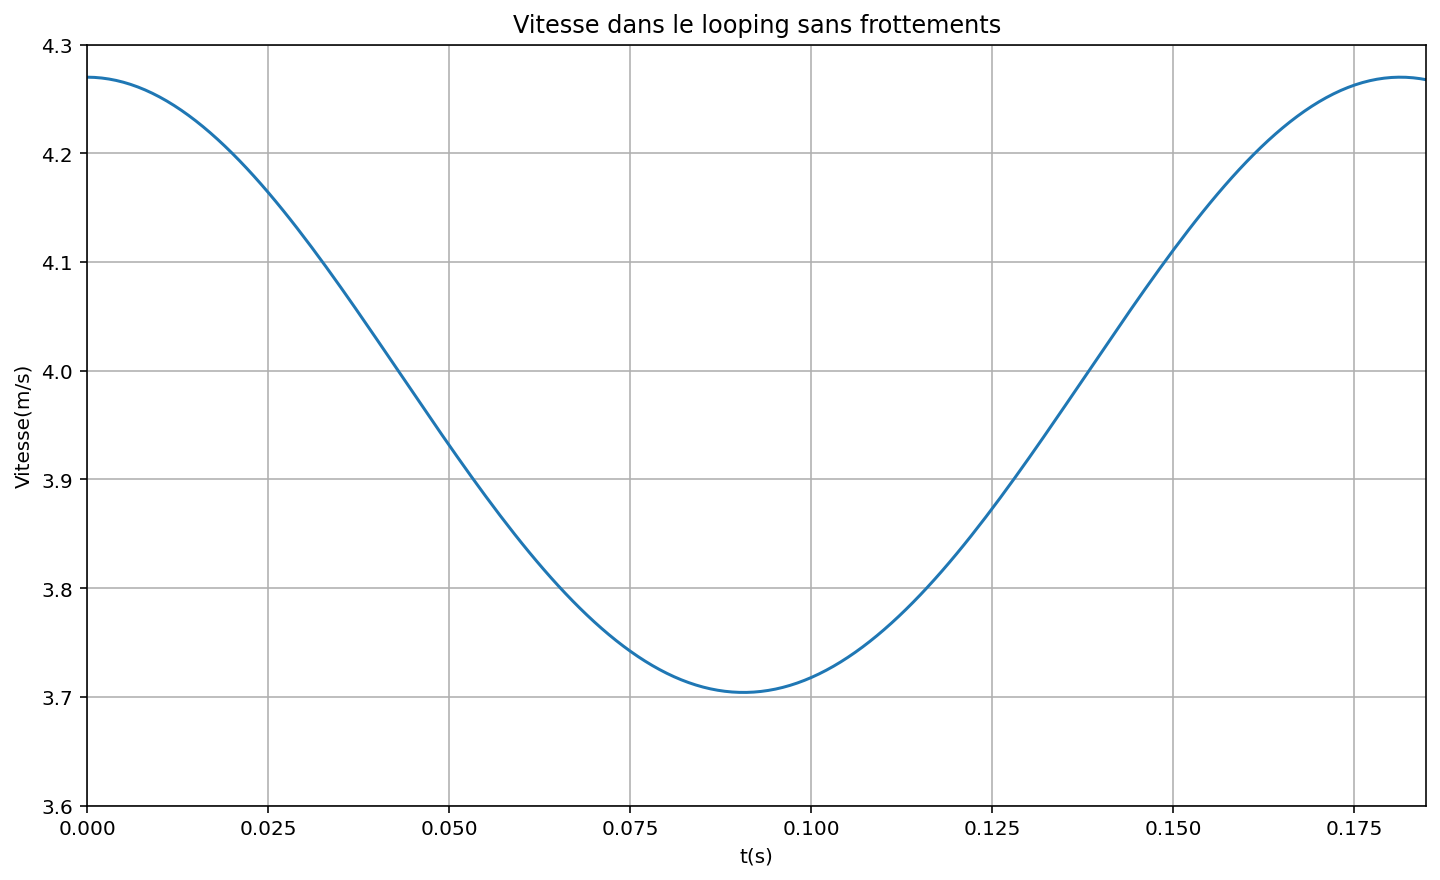

la vitesse de sortie du looping est de : 3.704747973880198 m/s


In [6]:
## Importation des bibliothèques nécessaires au calcul
#%pip install scipy

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Déclaration des constantes
P = 1.225           #Densité de l'air
Cx = 0.04          #Cx d'une bonne voiture
Sx = 0.0003          #Surface de face de la voiture si on pose notre voiture comme un pavé droit
g = 9.81            #Constante gravitationelle
u = 0.002         #coefficient de roulement 
r = 0.115           #rayon du looping


theta0_deg = 270   # angle initial en degrés
theta0 = theta0_deg*np.pi/180   # angle initial en radians
vecteurAngleVitesse_init = [theta0,2.27/r]    # conditions initiales : angle initial = theta0, vitesse angulaire initiale = 37,2 rad/s
m = 0.03 #masse en kg du véhicule
V0 = 4.28 # Vitesse du véhicule avant d'entrer dans le looing
k = 7.35**(-6)        #Coefficient de roulement plastique / plastique : µr = 0.002 Coefficient de traînée : Cx = 0.04
            #Surface de référence de la voiture (maître couple) : S1 = 3.10-4 m² Masse volumique de l’air : ρair = 1.225 kg.m-3
t0 = 0
tfinal = 0.8
t = np.linspace(t0, tfinal,100)

## Déclaration de la fonction renvoyant le vecteur VitesseAccélération en fonction du vecteur AngleVitesse pour (E2)

def vecteurVitesseAcceleration2(vecteurAngleVitesse2, t):
    dvecteurAngleVitesse2dt = [vecteurAngleVitesse2[1], - (g/r)*vecteurAngleVitesse2[0]]
    return dvecteurAngleVitesse2dt

sol2 = odeint(vecteurVitesseAcceleration2, vecteurAngleVitesse_init, t)

plt.plot(t, sol2[:, 0]*180/np.pi, color = "green")
plt.title("Position angulaire du looping (E2)")
plt.xlabel("Temps (s)")
plt.show()

def vecteurPositionVitessePrime(vecteurPositionVitesse, t):
    dydt = [vecteurPositionVitesse[1],-g/r*np.sin(vecteurPositionVitesse[0])-u*g/r*np.cos(vecteurPositionVitesse[0])]
    return dydt
theta = 4.27/r      #vitesse angulaire à déterminer par expérimentation
vecteurPositionVitesseInitiales=[0,theta]
t=np.linspace(0,1,1000)

#Résolution
vecteurPositionVitesse = odeint(vecteurPositionVitessePrime,vecteurPositionVitesseInitiales,t)

print("La vitesse minimale pour franchir le looping est de:", theta*r, "m/s")

plt.plot(t, vecteurPositionVitesse[:,1]*r)
plt.title("Vitesse dans le looping sans frottements")
plt.xlabel("t(s)")
plt.ylabel("Vitesse(m/s)")
plt.xlim(0,0.185)
plt.ylim(3.6,4.3)

plt.grid()
plt.show()

vouta = vecteurPositionVitesse[-1][1]*r
print("la vitesse de sortie du looping est de :", vouta, "m/s")


In [7]:
vfl = val

vflmax = valmax
print("la vitesse de sortie du looping est au minimum de :", vfl, "m/s"," et au maximum de ", vflmax, "m/s")

la vitesse de sortie du looping est au minimum de : 2.37 m/s  et au maximum de  4.27 m/s


Pour déterminer la vitesse de sortie du looping, sans prendre en compte les frottements, grâce au théorème de l'énergie cinétique :

L'énergie cinétique au début du looping est la même qu'à la fin du looping.

Sans les frottements, le seul force extérieure intervenante est le poids, or cette force est conservative. Ceci indique que durant tout le long du looping, le poids ne va pas changer. La vitesse perdue au début de la montée sera donc immédiatement regagnée dans la descente. Ainsi la vitesse de sortie du looping sera la même que celle avec laquelle la voiture est arrivée à celui\-ci.



<span style='font-size:large'>**Saut :**</span>

<span style='font-size:large'>**Sans frottements**</span>



**Équation du mouvement de la** <span style='font-size:medium'>**voiture**</span> **lâchée dans le ravin \(avec vitesse initiale\) :**



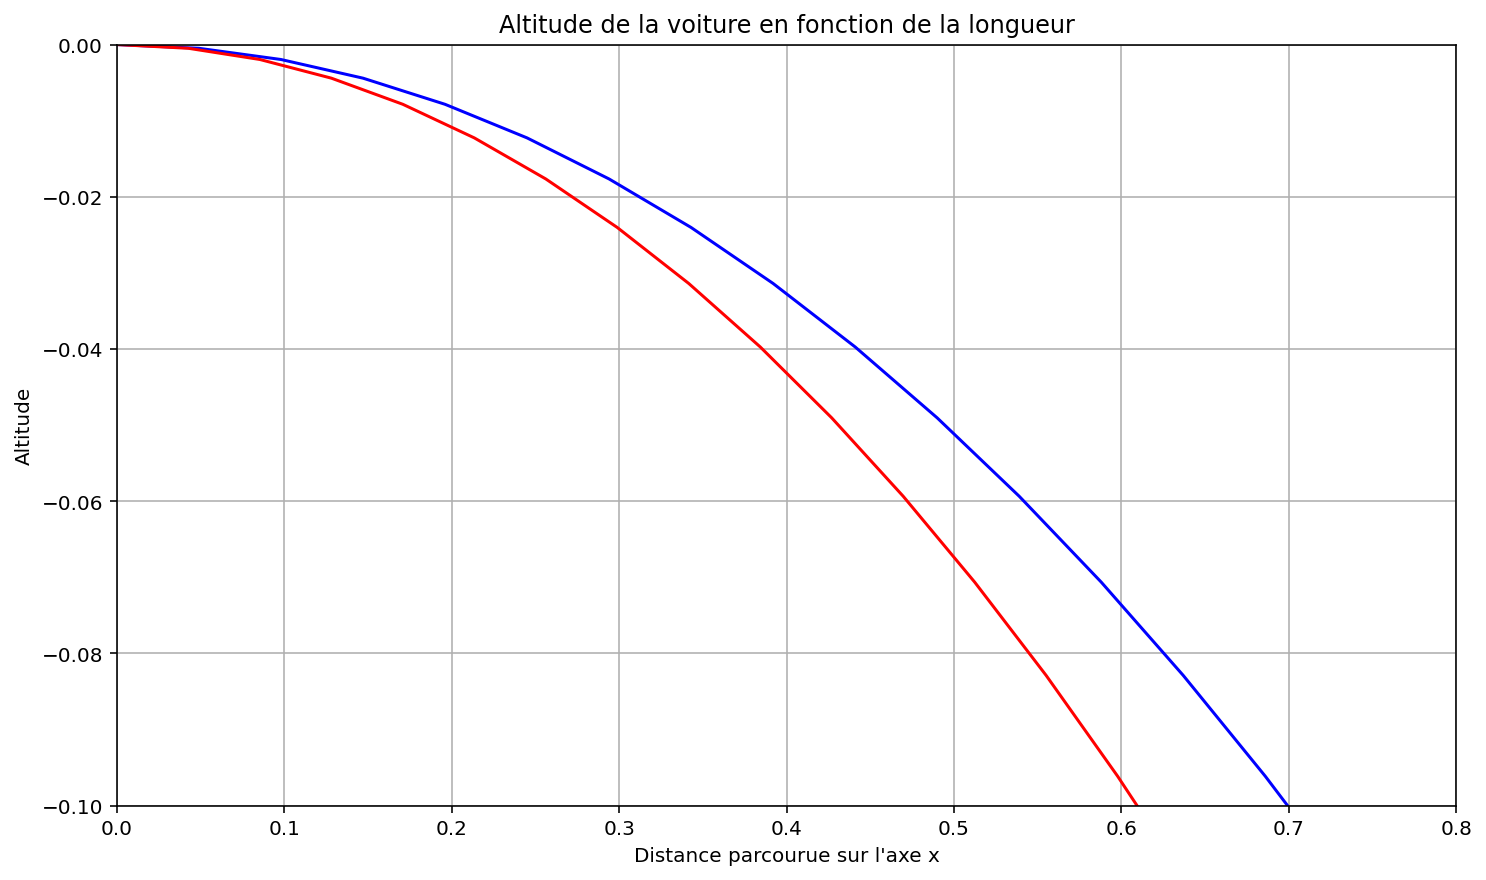

In [16]:
t = np.arange(0, 10, 0.01)
xc = 4.90 * t

yc = -0.5 * g * (xcb/4.90)**2


xcmax = vflmax * t

ycmax = -0.5 * g * (xcmax/vflmax)**2


plt.plot(xc,yc,"Red")
plt.plot(xcmax,ycmax,"Green")
plt.title("Altitude de la voiture en fonction de la longueur")
plt.xlabel("Distance parcourue sur l'axe x")
plt.ylabel("Altitude")
plt.grid()
plt.xlim(0,0.8)
plt.ylim(-0.1,0)
plt.show()


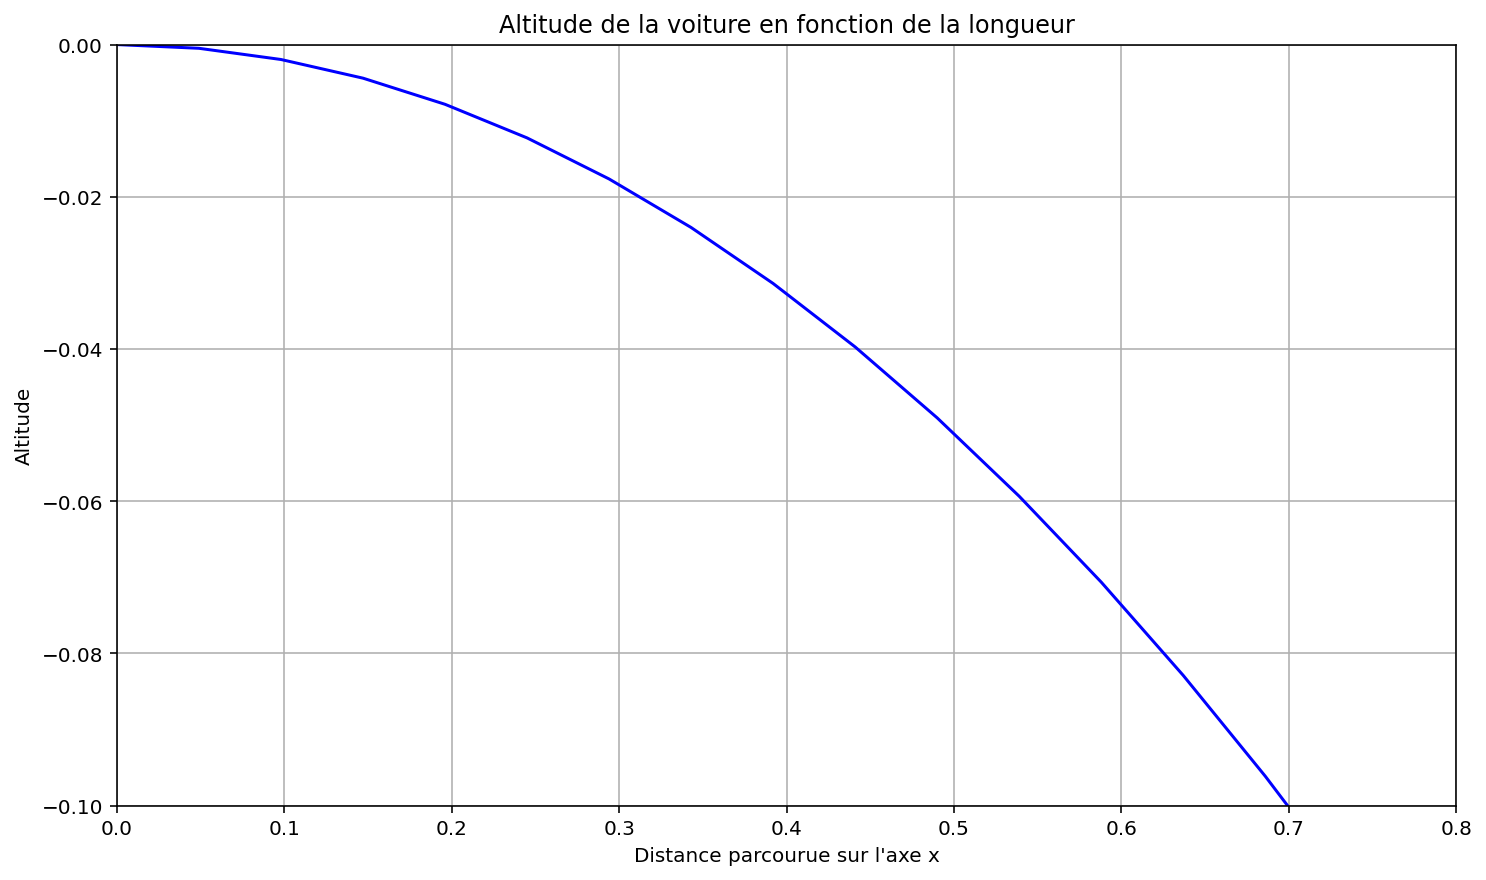

In [9]:
t = np.arange(0, 10, 0.01)
xc = vfl * t

yc = -0.5 * g * (xc/vfl)**2


xcmax = vflmax * t

ycmax = -0.5 * g * (xcmax/vflmax)**2

v = 4.9



plt.plot(xcb,ycb,"Blue")
plt.title("Altitude de la voiture en fonction de la longueur")
plt.xlabel("Distance parcourue sur l'axe x")
plt.ylabel("Altitude")
plt.grid()
plt.xlim(0,0.8)
plt.ylim(-0.1,0)
plt.show()


<span style='font-size:large'>**Pente :** </span>

<span style='font-size:large'>**Avec frottements**</span>



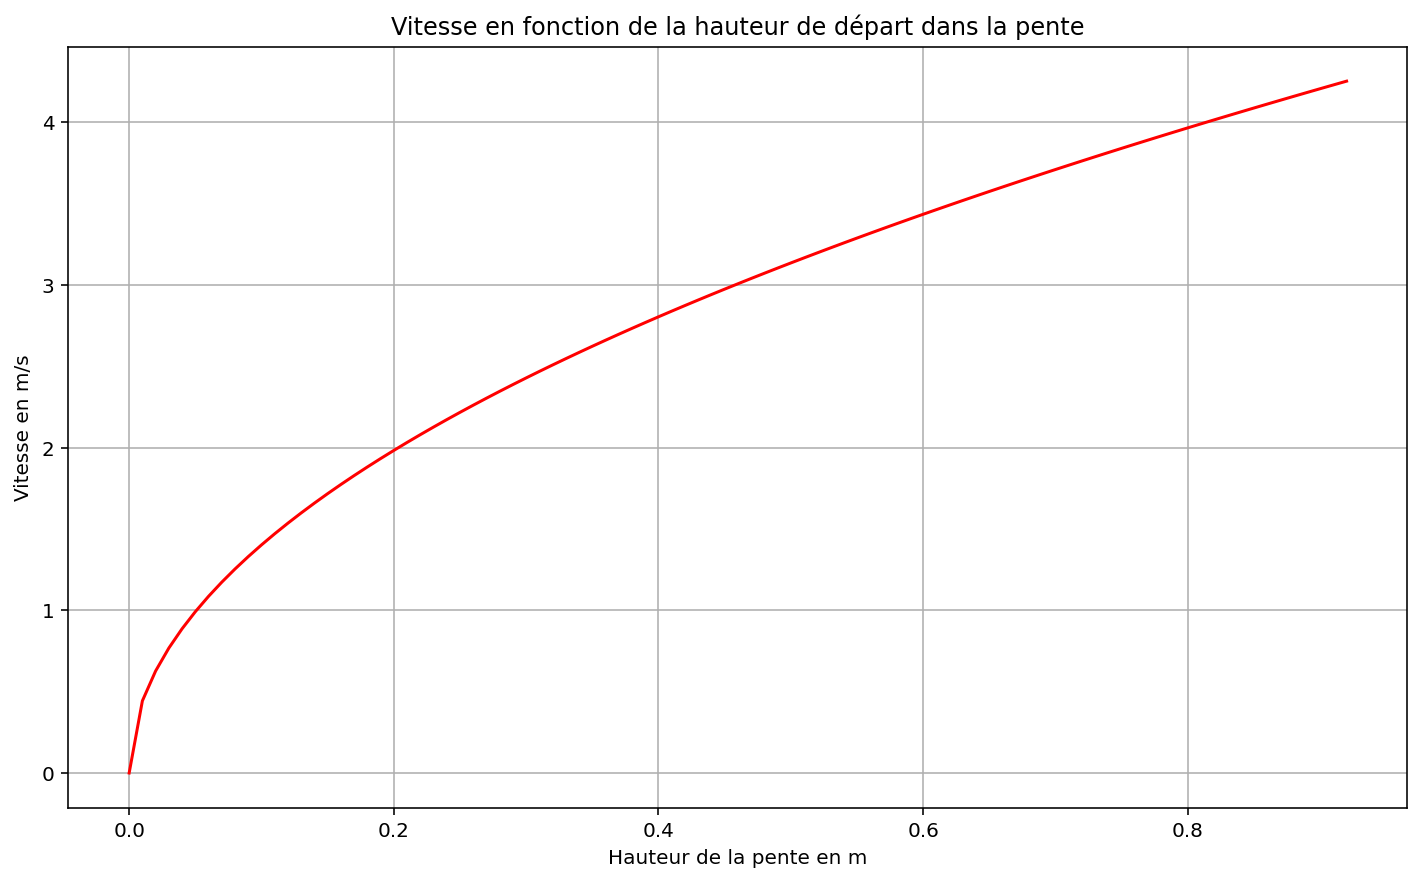

In [10]:
xp = np.arange(0, h, 0.01)

yp = 6.29 * (0.497*xp)**0.5                  # Calcul de la vitesse en bas de la pente (à l’aide de la 2ème loi de Newton)

plt.plot(xp, yp,"Red")
plt.ylabel("Vitesse en m/s")
plt.xlabel("Hauteur de la pente en m")
plt.title("Vitesse en fonction de la hauteur de départ dans la pente")
plt.grid()
plt.show()


<span style='font-size:large'>**Looping :** </span>

<span style='font-size:large'>**Avec frottements**</span>



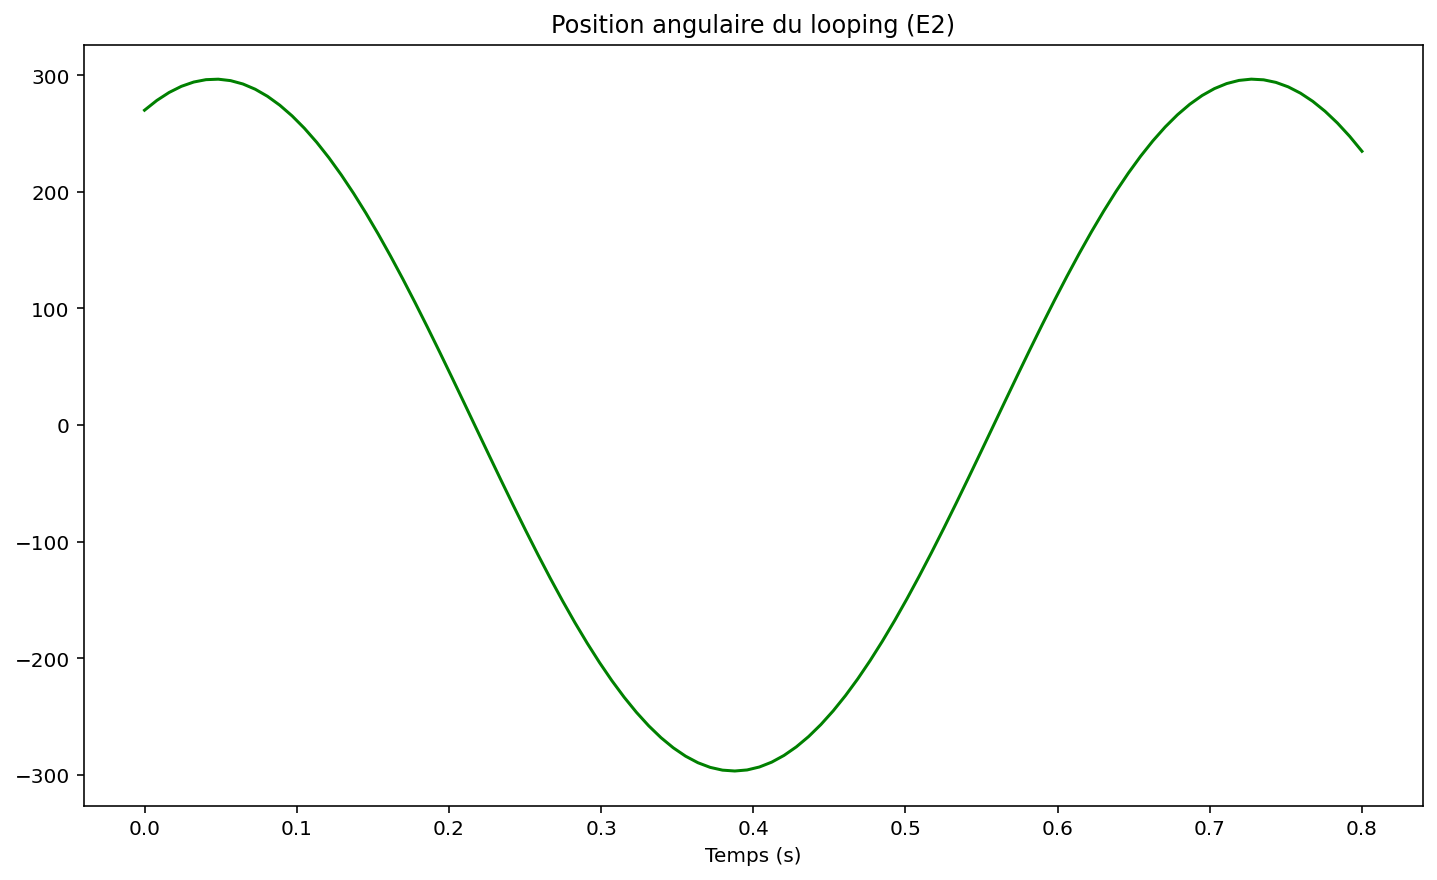

La vitesse minimale pour franchir le looping est de: 4.27 m/s


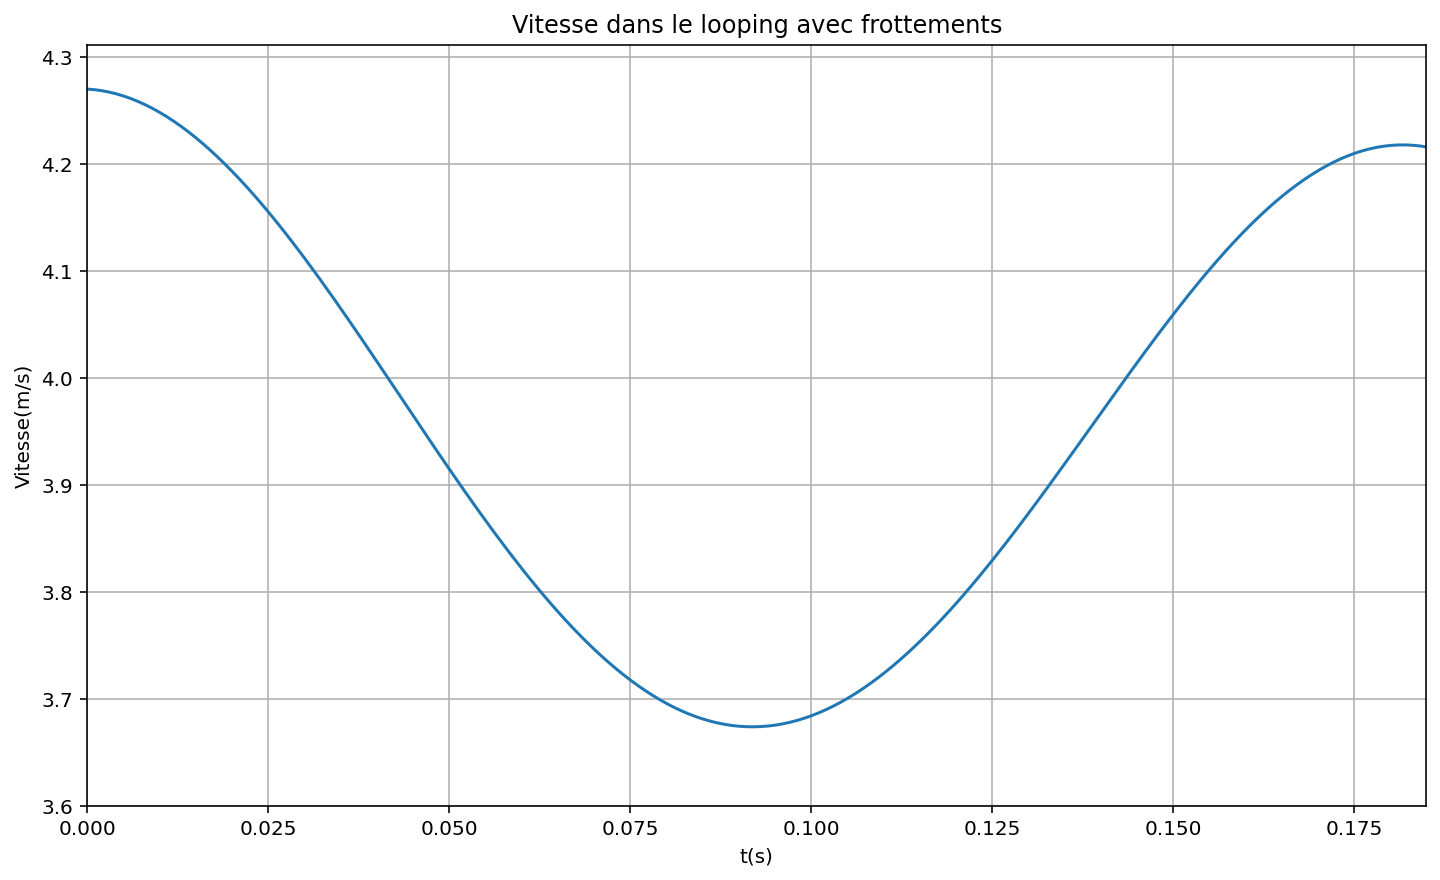

la vitesse de sortie du looping est de : 3.5816023201828826 m/s


In [11]:
from scipy.integrate import odeint

## Déclaration des constantes
P = 1.225           #Densité de l'air
Cx = 0.04          #Cx d'une bonne voiture
Sx = 0.0003          #Surface de face de la voiture si on pose notre voiture comme un pavé droit
g = 9.81            #Constante gravitationelle
u = 0.002         #coefficient de roulement 
r = 0.115           #rayon du looping


theta0_deg = 270   # angle initial en degrés
theta0 = theta0_deg*np.pi/180   # angle initial en radians
vecteurAngleVitesse_init = [theta0,2.27/r]    # conditions initiales : angle initial = theta0, vitesse angulaire initiale = 37,2 rad/s
m = 0.03 #masse en kg du véhicule
V0 = 4.28 # Vitesse du véhicule avant d'entrer dans le looping
k = 7.35**(-6)        #Coefficient de roulement plastique / plastique : µr = 0.002 Coefficient de traînée : Cx = 0.04
            #Surface de référence de la voiture (maître couple) : S1 = 3.10-4 m² Masse volumique de l’air : ρair = 1.225 kg.m-3
t0 = 0
tfinal = 0.8
t = np.linspace(t0, tfinal,100)

## Déclaration de la fonction renvoyant le vecteur VitesseAccélération en fonction du vecteur AngleVitesse pour (E2)

def vecteurVitesseAcceleration2(vecteurAngleVitesse2, t):
    dvecteurAngleVitesse2dt = [vecteurAngleVitesse2[1], - (g/r)*vecteurAngleVitesse2[0]-((0.04*m*g*np.sin(vecteurAngleVitesse2[0]))/(r*m))-((k*V0**2)/(r*m))]
    return dvecteurAngleVitesse2dt

sol2 = odeint(vecteurVitesseAcceleration2, vecteurAngleVitesse_init, t)

plt.plot(t, sol2[:, 0]*180/np.pi, color = "green")
plt.title("Position angulaire du looping (E2)")
plt.xlabel("Temps (s)")
plt.show()

def vecteurPositionVitessePrime(vecteurPositionVitesse, t):
    dydt = [vecteurPositionVitesse[1],-g/r*np.sin(vecteurPositionVitesse[0])-u*g/r*np.cos(vecteurPositionVitesse[0])+vecteurPositionVitesse[1]**2*(-u-(P*Sx*Cx)/(2*m))]
    return dydt
theta = 4.27/r      #vitesse angulaire à déterminer par expérimentation
vecteurPositionVitesseInitiales=[0,theta]
t=np.linspace(0,1,1000)

#Résolution
vecteurPositionVitesse = odeint(vecteurPositionVitessePrime,vecteurPositionVitesseInitiales,t)

print("La vitesse minimale pour franchir le looping est de:", theta*r, "m/s")

plt.plot(t, vecteurPositionVitesse[:,1]*r)
plt.title("Vitesse dans le looping avec frottements")
plt.xlabel("t(s)")
plt.ylabel("Vitesse(m/s)")
plt.xlim(0,0.185)
plt.ylim(3.6)
plt.grid()
plt.show()

vouta = vecteurPositionVitesse[-1][1]*r
print("la vitesse de sortie du looping est de :", vouta, "m/s")

<span style='font-size:large'>**Saut :**</span>

<span style='font-size:large'>**Avec frottements**</span>



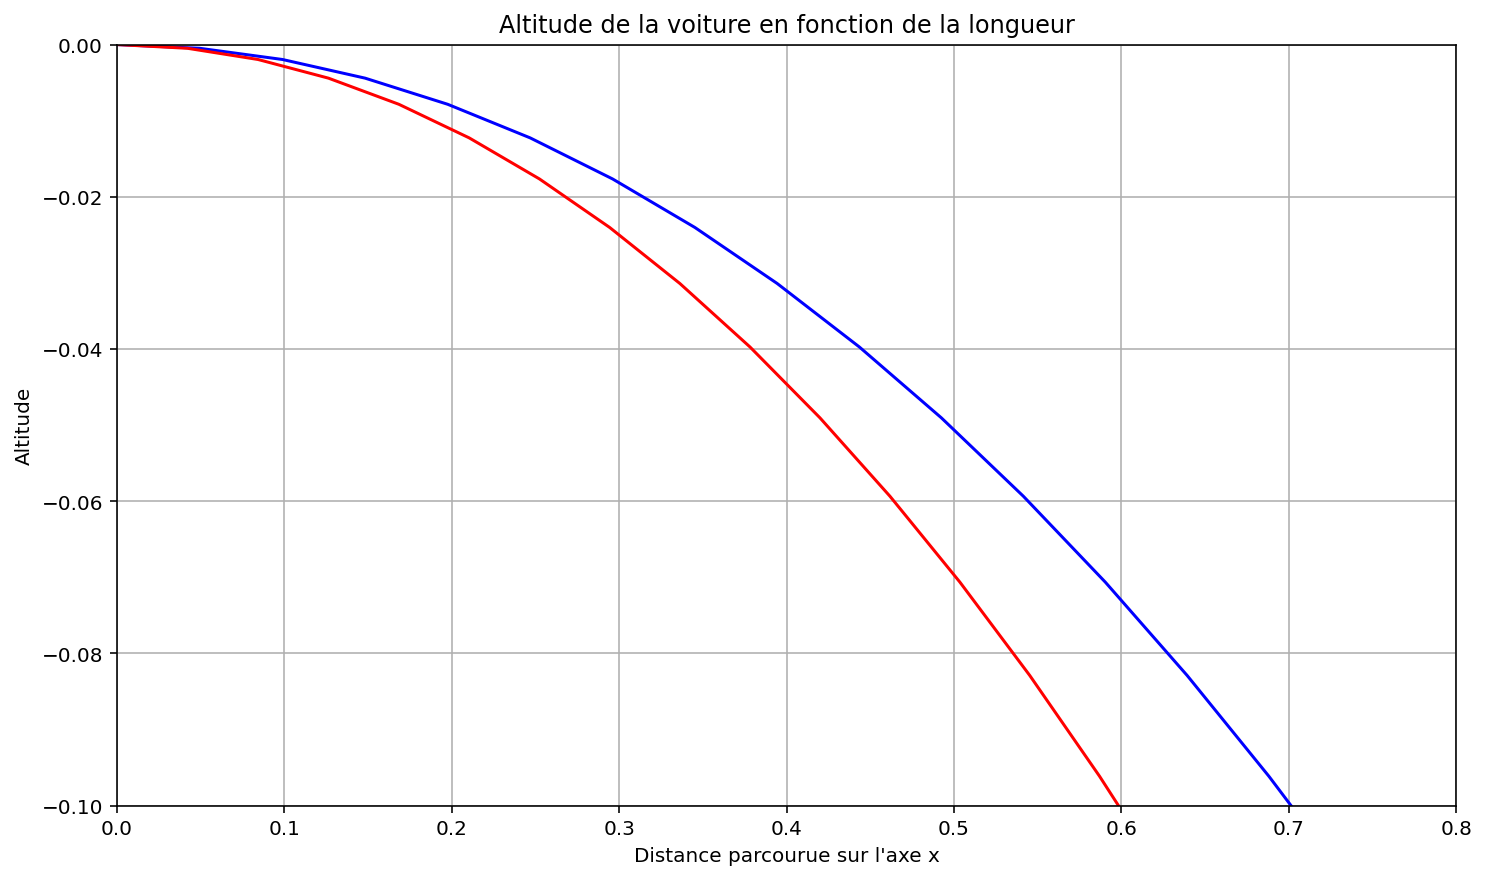

In [19]:
t = np.arange(0, 10, 0.01)
xc = (2*m)/(ro*SCx) * np.log((ro*SCx*4.95)/(2*m)*t+1)

yc = -0.5 * g * (t)**2

zc = (2*m)/(ro*SCx) * np.log((ro*SCx*4.218)/(2*m)*t+1)



plt.plot(xc,yc,"Blue")
plt.plot(zc,yc,"Red")
plt.title("Altitude de la voiture en fonction de la longueur")
plt.xlabel("Distance parcourue sur l'axe x")
plt.ylabel("Altitude")
plt.xlim(0,0.8)
plt.ylim(-0.1,0)
plt.grid()
plt.show()


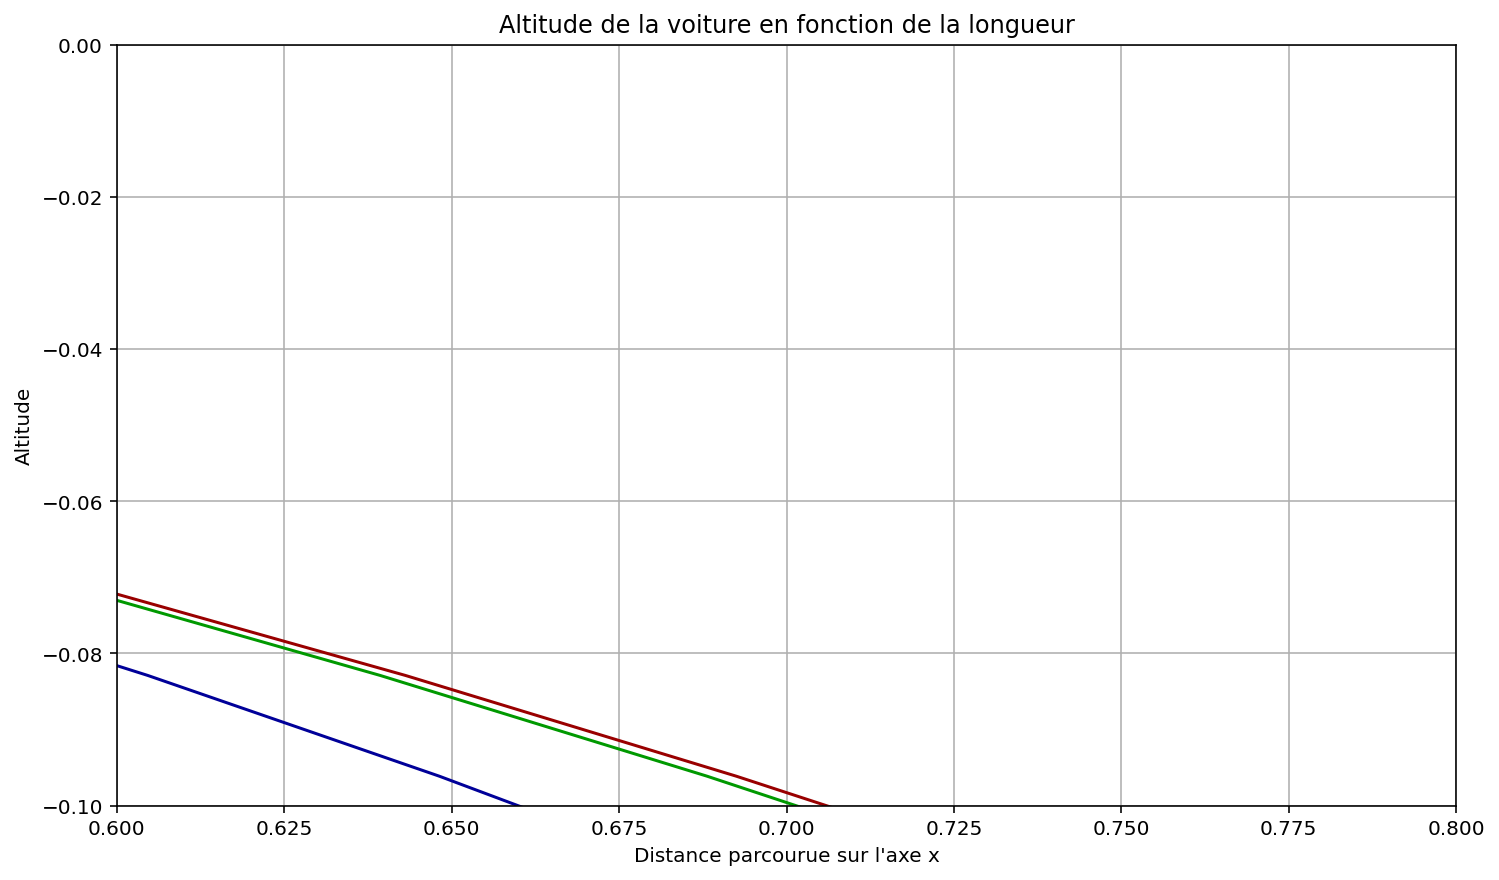

In [13]:
t = np.arange(0, 10, 0.01)

xn = (2*m)/(ro*SCx) * np.log((ro*SCx*4.95)/(2*m)*t+1)
xm = (2*m)/(ro*SCx/10) * np.log((ro*SCx/10*4.95)/(2*m)*t+1)
xp = (2*m)/(ro*SCx*10) * np.log((ro*SCx*10*4.95)/(2*m)*t+1)

yc = -0.5 * g * (t)**2

plt.plot(xn,yc,"#009900")
plt.plot(xm,yc,"#990000")
plt.plot(xp,yc,"#000099")


plt.title("Altitude de la voiture en fonction de la longueur")
plt.xlabel("Distance parcourue sur l'axe x")
plt.ylabel("Altitude")
plt.xlim(0.6,0.8)
plt.ylim(-0.1,0)
plt.grid()
plt.show()


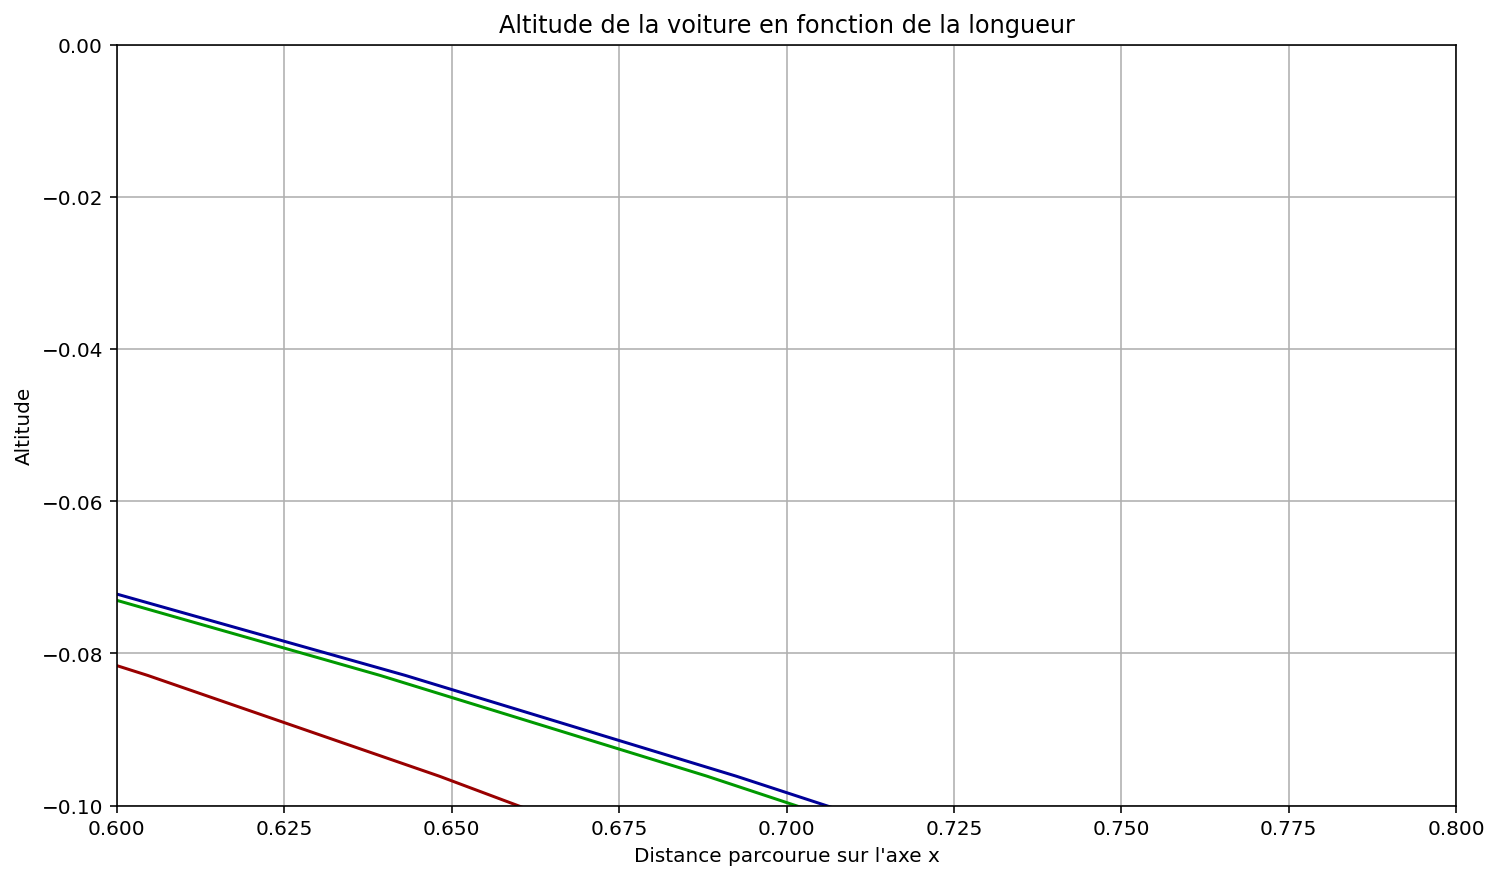

In [14]:
t = np.arange(0, 10, 0.01)

xn = (2*m)/(ro*SCx) * np.log((ro*SCx*4.95)/(2*m)*t+1)
xm = (2*m/10)/(ro*SCx) * np.log((ro*SCx*4.95)/(2*m/10)*t+1)
xp = (2*m*10)/(ro*SCx) * np.log((ro*SCx*4.95)/(2*m*10)*t+1)

yc = -0.5 * g * (t)**2

plt.plot(xn,yc,"#009900")
plt.plot(xm,yc,"#990000")
plt.plot(xp,yc,"#000099")

plt.title("Altitude de la voiture en fonction de la longueur")
plt.xlabel("Distance parcourue sur l'axe x")
plt.ylabel("Altitude")
plt.xlim(0.6,0.8)
plt.ylim(-0.1,0)
plt.grid()
plt.show()